# 시각화


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import nltk


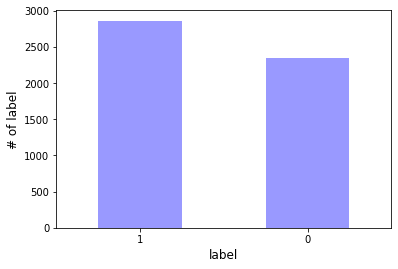

<Figure size 432x288 with 0 Axes>

In [4]:
#submit.csv 부르기
submit_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/submit.csv")

submit_csv["label"].value_counts().plot(kind='bar', color = 'b', alpha = 0.4)
plt.ylabel("# of label", fontsize=12)
plt.xlabel("label", fontsize=12)
plt.xticks(rotation=0)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/data/submit01.png')


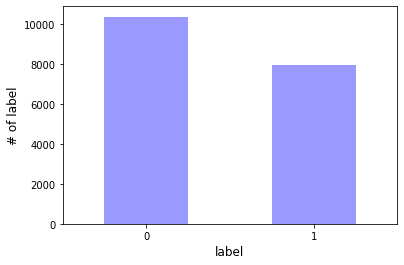

<Figure size 432x288 with 0 Axes>

In [5]:
#train.csv
train_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/train.csv").dropna()

train_csv["label"].value_counts().plot(kind='bar', color = 'b', alpha = 0.4)
plt.ylabel("# of label", fontsize=12)
plt.xlabel("label", fontsize=12)
plt.xticks(rotation=0)
plt.show()
plt.savefig('/content/drive/MyDrive/Colab Notebooks/data/train01.png')

# 2

In [7]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 5.0 MB/s 
     |████████████████████████████████| 448 kB 39.1 MB/s 


In [8]:


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
import re 

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
#train_csv
train_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/train.csv").dropna()

#조인
train_join = " ".join(train_csv["title"])

#특문자 제거
pattern = '[^a-zA-Z ]*'
p = re.compile( pattern )
tmp1 = p.sub( '' , train_join ).lower()

# 불용어 제거
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
word_tokens = word_tokenize(tmp1)

result1 = [i for i in word_tokens if not i in stop_words]
train1 = set(result1)

In [10]:
#test_csv
test_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/test.csv").dropna()

#조인
test_join = " ".join(test_csv["title"])

#특문자 제거
pattern = '[^a-zA-Z ]*'
p = re.compile( pattern )
tmp2 = p.sub( '' , test_join ).lower()

# 불용어 제거
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
word_tokens1 = word_tokenize(tmp2)

result2 = [i for i in word_tokens1 if not i in stop_words]
test1 = set(result2)

In [11]:
result3 =  train1- test1
len(result3)

result4 = test1 - train1
len(result4)

2485

In [12]:
print("train 개수          : ", len(word_tokens))
print("test  개수          : ", len(word_tokens1))

print("train 중복제거 개수 : ", len(train1))
print("test  중복제거 개수 : ", len(test1))

print("Train-Test 개수     : ", len(result3))
print("Test-Train 개수     : ", len(result4))


train 개수          :  215885
test  개수          :  53654
train 중복제거 개수 :  21414
test  중복제거 개수 :  10238
Train-Test 개수     :  13661
Test-Train 개수     :  2485


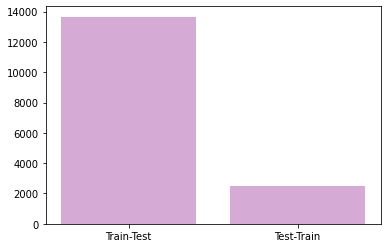

In [13]:
plt.bar(("Train-Test","Test-Train"),(len(result3),len(result4)),color = 'purple', alpha = 0.33)
plt.show()


# 워드클라우드

In [14]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

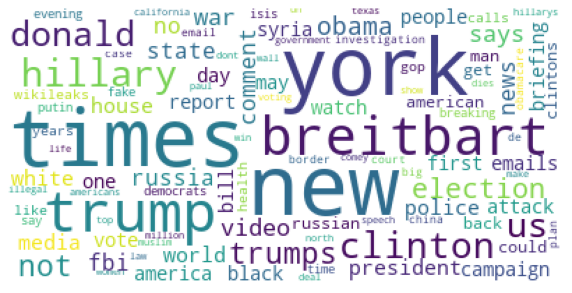

In [15]:
#train
count_train = Counter(result1)
count_train
words_train = dict(count_train.most_common(100))

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(words_train))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

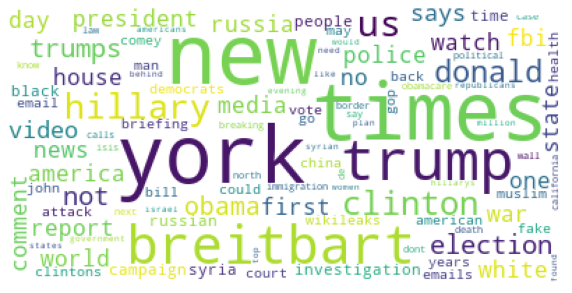

In [16]:
#test
count_test = Counter(result2)
count_test
words_test = dict(count_test.most_common(100))

wc = WordCloud(background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(words_test))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

# 푹환이의 궁금증

In [34]:

train_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/train.csv").dropna()

test_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/test.csv").dropna()

In [35]:
#train_csv

#조인
train_join = " ".join(train_csv["text"])

#특문자 제거

pattern = '[^a-zA-Z ]*'
p = re.compile( pattern )
tmp1 = p.sub( '' , train_join ).lower()

# 불용어 제거
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
word_tokens = word_tokenize(tmp1)

result11 = [i for i in word_tokens if not i in stop_words]

string1 = ''.join(result11)
al_train = Counter(string1)

train_list = al_train.items()
train_list = sorted(train_list) 
x, train_y = zip(*train_list) 



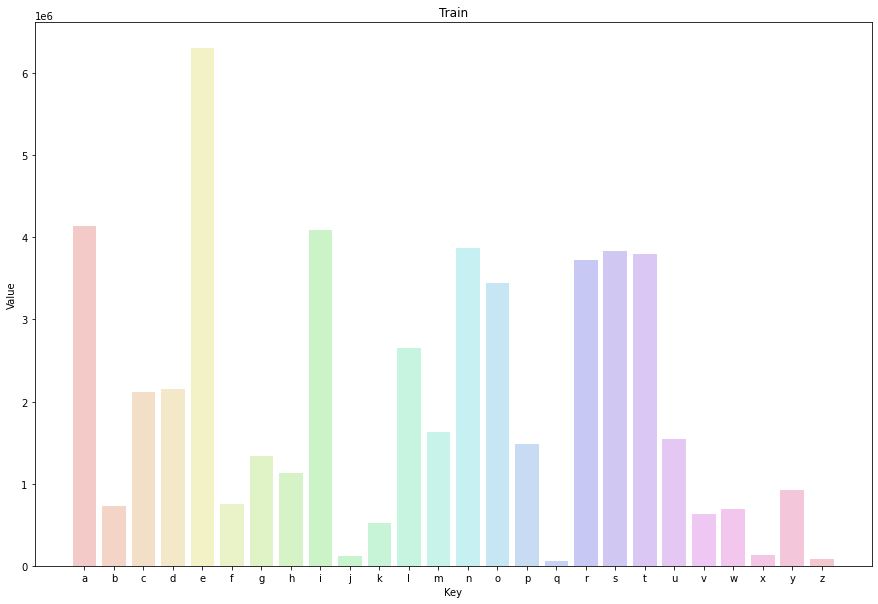

In [36]:
plt.figure(figsize=(15,10))
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Train')
colors = sns.color_palette('hls',26)
plt.bar(x,train_y,color = colors, alpha = 0.33)

plt.show()

In [37]:
#test_csv

#조인
test_join = " ".join(test_csv["text"])

#특문자 제거

pattern = '[^a-zA-Z ]*'
p = re.compile( pattern )
tmp2 = p.sub( '' , test_join ).lower()

# 불용어 제거
stop_words = stopwords.words('english')
stop_words.remove('no')
stop_words.remove('not')
word_tokens = word_tokenize(tmp2)

result12 = [i for i in word_tokens if not i in stop_words]

string = ''.join(result12)
al_test = Counter(string)

test_list = al_test.items()
test_list = sorted(test_list) 
x, test_y = zip(*test_list) 


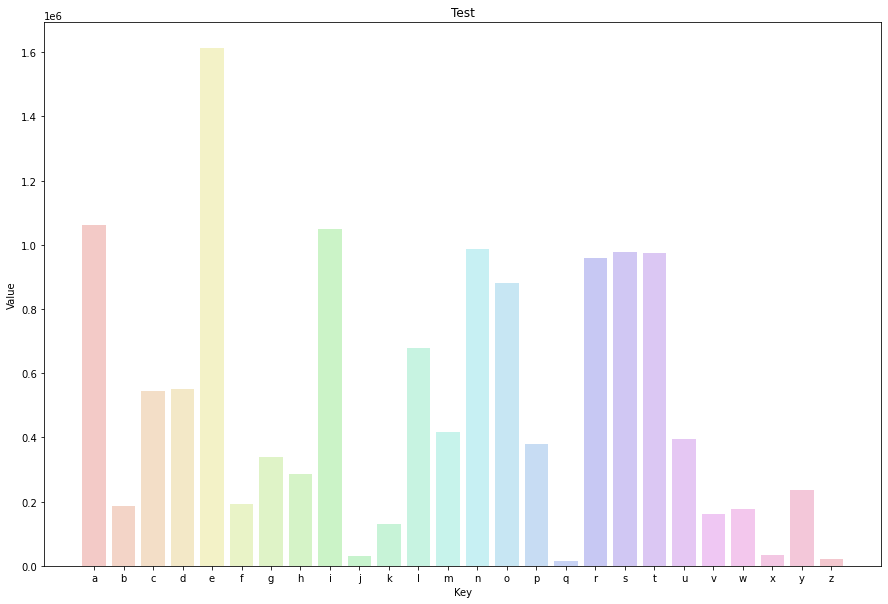

In [38]:
plt.figure(figsize=(15,10))
plt.xlabel('Key')
plt.ylabel('Value')
plt.title('Test')
colors = sns.color_palette('hls',26)
plt.bar(x,test_y,color = colors, alpha = 0.33)

plt.show()

In [39]:
'''test_val=list(al_test.values())
total = sum(test_val)
test_y = []
for i in range(0,len(test_val)):
  test_y.append((round(test_val[i]/total,3)))
'''

'test_val=list(al_test.values())\ntotal = sum(test_val)\ntest_y = []\nfor i in range(0,len(test_val)):\n  test_y.append((round(test_val[i]/total,3)))\n'

In [40]:
train_y

(4142210,
 722363,
 2121927,
 2158261,
 6305755,
 749052,
 1339719,
 1132726,
 4089600,
 121659,
 519723,
 2658483,
 1626313,
 3866723,
 3445270,
 1478300,
 60029,
 3729620,
 3829533,
 3802550,
 1550349,
 625246,
 687455,
 126747,
 922780,
 80350)

In [52]:
tr = [100 * i/sum(train_y) for i in train_y]

tr

[7.9822529327463,
 1.3920308664354089,
 4.089063089226175,
 4.159080586663149,
 12.151516060733194,
 1.4434619499686112,
 2.5817078122079615,
 2.1828215941485305,
 7.88087074140598,
 0.23444318601543188,
 1.00153310454219,
 5.123034255483469,
 3.133989274762369,
 7.45137523372006,
 6.639213502358124,
 2.8487605675421706,
 0.1156789881005134,
 7.187170660837875,
 7.3797081800050535,
 7.327710543264209,
 2.9876027173973054,
 1.2048813838960102,
 1.324761344760673,
 0.24424802520074917,
 1.7782447923402314,
 0.1548386062382557]

In [58]:
sum(tr)

99.99999999999999

In [53]:
te = [100 * i/sum(test_y) for i in test_y]

te

[8.00159988928477,
 1.397900250728131,
 4.110671859379611,
 4.1410839114371525,
 12.14600435406616,
 1.442528186490709,
 2.5637533065294655,
 2.1596848832524316,
 7.895673484643646,
 0.23527739307799408,
 0.9915127108297249,
 5.115775497162508,
 3.1407163916894607,
 7.433386198650862,
 6.6387273350586655,
 2.8490874765518863,
 0.11735633656074554,
 7.222790832471759,
 7.373443057667922,
 7.340719418588428,
 2.973792702146591,
 1.2079661053576187,
 1.3214974054129838,
 0.24389878441394003,
 1.7777158342732156,
 0.15743639427361916]

In [57]:
sum(te)

100.0

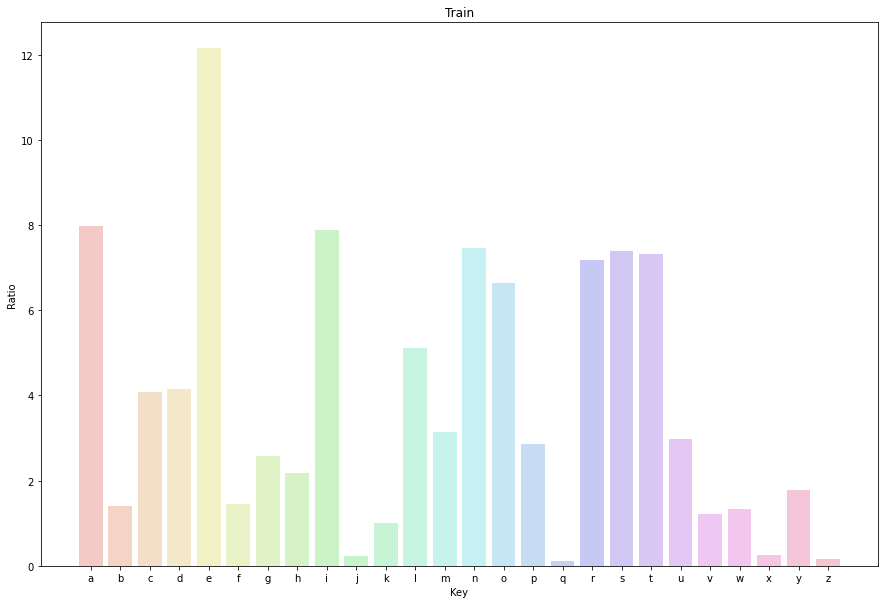

In [54]:
plt.figure(figsize=(15,10))
plt.xlabel('Key')
plt.ylabel('Ratio')
plt.title('Train')
colors = sns.color_palette('hls',26)
plt.bar(x, tr, color = colors, alpha = 0.33)

plt.show()

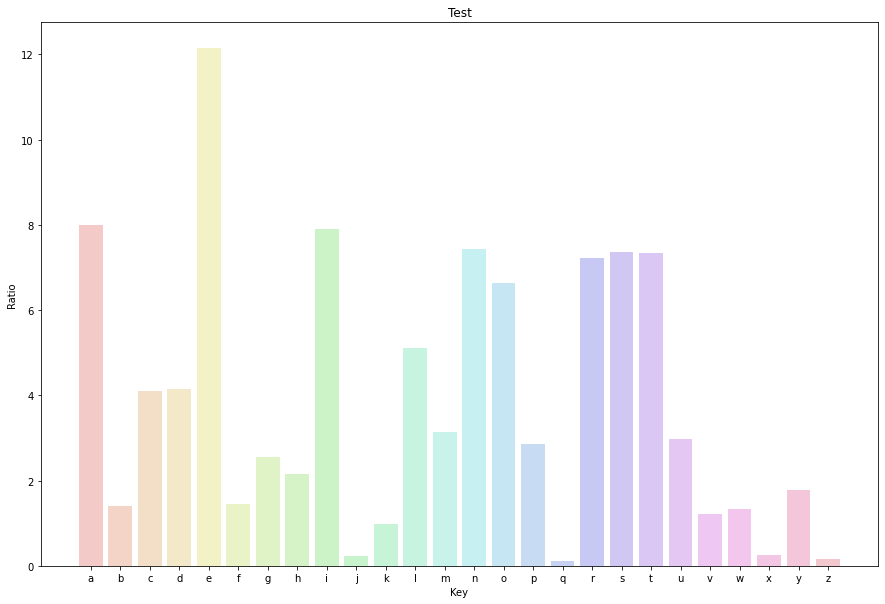

In [55]:
plt.figure(figsize=(15,10))
plt.xlabel('Key')
plt.ylabel('Ratio')
plt.title('Test')
colors = sns.color_palette('hls',26)
plt.bar(x, te, color = colors, alpha = 0.33)

plt.show()

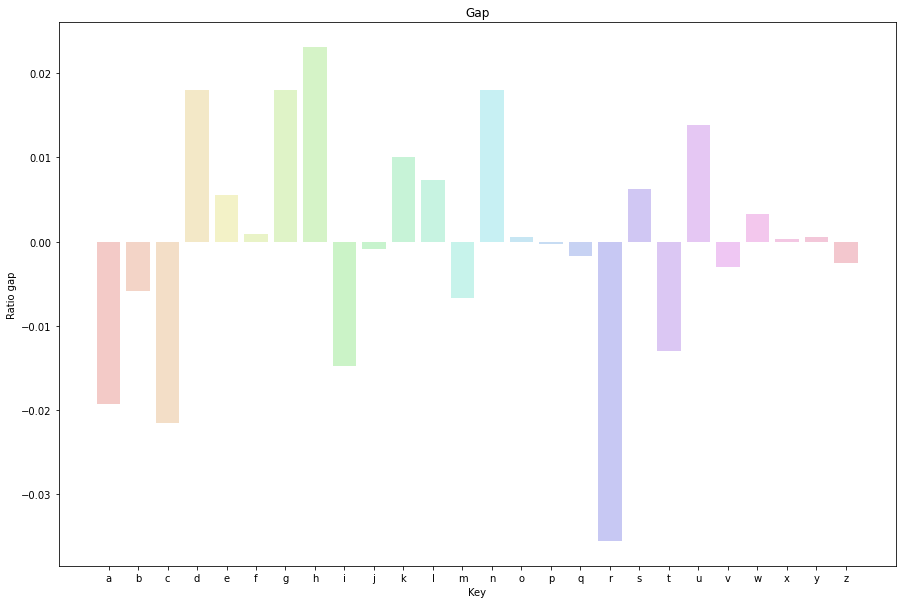

In [56]:
gap = np.array(tr) - np.array(te)

plt.figure(figsize=(15,10))
plt.xlabel('Key')
plt.ylabel('Ratio gap')
plt.title('Gap')
colors = sns.color_palette('hls',26)
plt.bar(x, gap, color = colors, alpha = 0.33)

plt.show()

In [63]:
name = []
for i in range(1,len(train_y)):
  name.append(train_y[i])
name

[722363,
 2121927,
 2158261,
 6305755,
 749052,
 1339719,
 1132726,
 4089600,
 121659,
 519723,
 2658483,
 1626313,
 3866723,
 3445270,
 1478300,
 60029,
 3729620,
 3829533,
 3802550,
 1550349,
 625246,
 687455,
 126747,
 922780,
 80350]

AttributeError: ignored